In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df_diabetes = pd.read_csv(r'data\diabetes.csv')
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df_diabetes['Outcome']
x = df_diabetes.drop(('Outcome'),axis=1)
y = df_diabetes['Outcome']
y1 = df_diabetes.Outcome

#To check the distribution of diabetes data in 768 records
df_diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

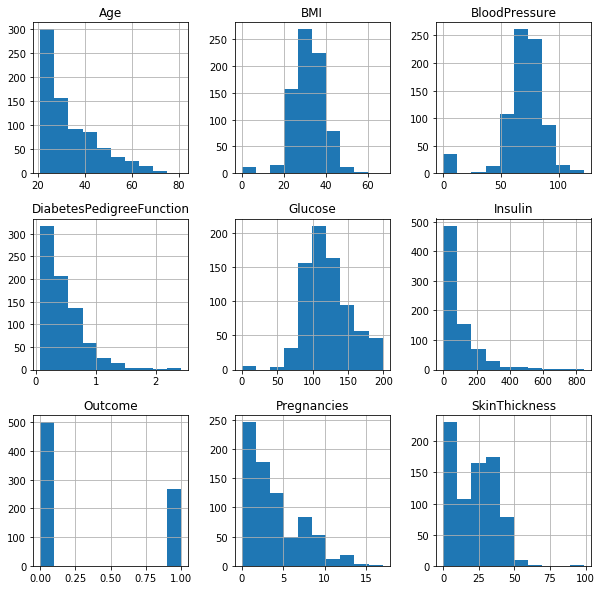

In [3]:
df_diabetes.hist(figsize=(10,10))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0, stratify=y)


In [5]:
#Cchecking whether distribution is same in split data or not
df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)
print(df_ytrain.groupby('Outcome').size())
print(df_ytest.groupby('Outcome').size())

Outcome
0    375
1    201
dtype: int64
Outcome
0    125
1     67
dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.751875 (0.057640)
LDA: 0.760436 (0.051901)
KNN: 0.701573 (0.064701)
CART: 0.680460 (0.054339)
NB: 0.736146 (0.057033)
SVM: 0.651180 (0.089833)


In [7]:
#Using logistic regression ater above analysis of different model
model = LogisticRegression().fit(x_train, y_train)
print('Training score: ',model.score(x_train,y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.7743055555555556
Testing score:  0.7760416666666666
